In [3]:

from experimental.forest_t import forest_task
import optax

lrs = [0.01, 0.005, 0.0025 ,0.001, 0.0005, 0.00025]
opts = [optax.sgd(0.005), optax.adam(0.0025), optax.noisy_sgd(0.005, 0.001, 0.75), optax.adamw(0.001)]
val_accs = []
test_accs = []

for key in [42,43,44, 45, 46]:
    temp = []
    test = []
    for idx, opt in enumerate(opts):
        task = forest_task(opt, state=key)
        test_acc, vals = task.train(10000)
        temp.append(vals)
        test.append(test_acc)
    print(key)

    val_accs.append(temp)
    test_accs.append(test)

42
43
44
45
46


In [ ]:
print(vals)

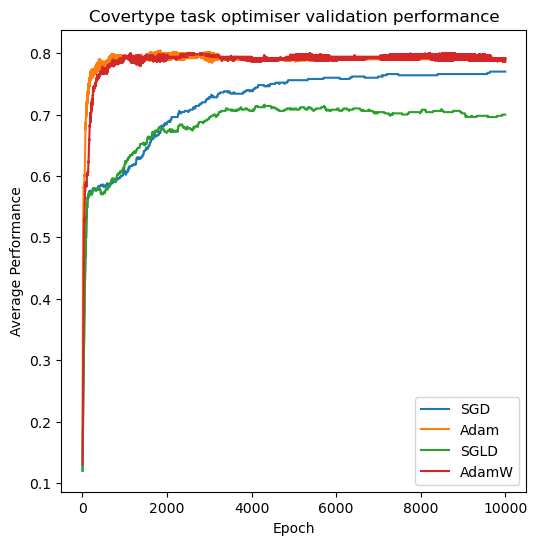

In [8]:
import matplotlib.pyplot as plt
import numpy as np

vals_np = np.array(val_accs)


# Compute the column-wise mean
column_means = vals_np.mean(axis=0)
std = vals_np.std(axis=0)

# Create plot
plt.figure(figsize=(6, 6))

# Assuming the x-axis represents the epochs
epochs = np.arange(1, 10001)  # or whatever the number of epochs/steps is

# Assuming the optimizers are as follows
optimizers = ['SGD', 'Adam', 'SGLD', 'AdamW']

for idx, optimizer in enumerate(optimizers):
    plt.plot(epochs, column_means[idx], label=optimizer)
    #plt.fill_between(epochs, column_means[idx] - std[idx], column_means[idx] + std[idx], alpha=0.2)

# for idx, optimizer in enumerate(optimizers):
#     plt.plot(epochs[1000:], column_means[idx][1000:], label=optimizer)
#     plt.fill_between(epochs[1000:], column_means[idx][1000:] - std[idx][1000:], column_means[idx][1000:] + std[idx][1000:], alpha=0.2)

plt.xlabel('Epoch')
plt.ylabel('Average Performance')
plt.title('Covertype task optimiser validation performance')
plt.legend()

plt.show()

In [11]:
tests_np = np.array(test_accs)


# Compute the column-wise mean
column_means = tests_np.mean(axis=0)
std = tests_np.std(axis=0)

print(std)

[0.00827313 0.01024154 0.01481742 0.01181337]
